In [1]:
import pandas as pd
import numpy as np

##### 데이터프레임 불러오기

In [8]:
# header_row=['DA_CC,DA_DEMAND,DA_EC,DA_LMP_DA_MLC']
df1 = pd.read_excel('Case1.xlsx',sheet_name='me',header=0)
df1.head()

,DA_CC,DA_DEMD,DA_EC,DA_LMP,DA_MLC,DEMAND,Date,Day,DewPnt,DryBulb,Hour,Month,RT_CC,RT_EC,RT_LMP,RT_MLC,Year,DewPnt2,DryBulb2
0,0.0,NaN,72.89,70.05,-2.84,1111.0,2003-01-03 00:00:00,1,17,21,1,3,0.0,78.83,75.38,-3.45,2003,18,23
1,0.0,NaN,71.02,68.25,-2.77,1063.0,2003-01-03 00:00:00,1,17,20,2,3,0.0,137.51,131.87,-5.64,2003,18,22
2,0.0,NaN,70.00,67.27,-2.73,1053.0,2003-01-03 00:00:00,1,17,20,3,3,0.0,151.19,145.13,-6.06,2003,18,21
3,0.0,NaN,69.11,66.43,-2.68,1050.0,2003-01-03 00:00:00,1,16,19,4,3,0.0,150.55,144.44,-6.11,2003,18,21
4,0.0,NaN,69.99,67.27,-2.72,1077.0,2003-01-03 00:00:00,1,15,18,5,3,0.0,146.43,141.18,-5.25,2003,18,22


##### 필요없는 columns 정리하기

In [18]:
df2 = df1[['DEMAND','DA_CC','DA_EC','DA_LMP','DA_MLC','DewPnt','DryBulb','RT_CC','RT_EC','RT_LMP','RT_MLC','DewPnt2','DryBulb2']]
df2.head(10)

,DEMAND,DA_CC,DA_EC,DA_LMP,DA_MLC,DewPnt,DryBulb,RT_CC,RT_EC,RT_LMP,RT_MLC,DewPnt2,DryBulb2
0,1111.0,0.00,72.89,70.05,-2.84,17,21,0.0,78.83,75.38,-3.45,18,23
1,1063.0,0.00,71.02,68.25,-2.77,17,20,0.0,137.51,131.87,-5.64,18,22
2,1053.0,0.00,70.00,67.27,-2.73,17,20,0.0,151.19,145.13,-6.06,18,21
3,1050.0,0.00,69.11,66.43,-2.68,16,19,0.0,150.55,144.44,-6.11,18,21
4,1077.0,0.00,69.99,67.27,-2.72,15,18,0.0,146.43,141.18,-5.25,18,22
5,1138.0,0.00,69.98,67.27,-2.71,11,14,0.0,157.09,152.20,-4.89,18,21
6,1208.0,-0.89,73.26,69.54,-2.83,11,14,0.0,186.15,181.40,-4.75,18,22
7,1305.0,-1.23,81.01,76.67,-3.11,12,16,0.0,154.43,151.97,-2.46,18,22
8,1386.0,-0.11,85.03,81.66,-3.26,15,19,0.0,141.06,139.22,-1.84,19,24
9,1393.0,-0.12,88.00,84.51,-3.37,18,22,0.0,156.97,154.00,-2.97,21,27


In [23]:
# 2007년 12월 31일까지의 데이터만 가져오기
df3 = df2.iloc[:42408]
df3.head()

,DEMAND,DA_CC,DA_EC,DA_LMP,DA_MLC,DewPnt,DryBulb,RT_CC,RT_EC,RT_LMP,RT_MLC,DewPnt2,DryBulb2
0,1111.0,0.0,72.89,70.05,-2.84,17,21,0.0,78.83,75.38,-3.45,18,23
1,1063.0,0.0,71.02,68.25,-2.77,17,20,0.0,137.51,131.87,-5.64,18,22
2,1053.0,0.0,70.00,67.27,-2.73,17,20,0.0,151.19,145.13,-6.06,18,21
3,1050.0,0.0,69.11,66.43,-2.68,16,19,0.0,150.55,144.44,-6.11,18,21
4,1077.0,0.0,69.99,67.27,-2.72,15,18,0.0,146.43,141.18,-5.25,18,22


##### dataset 분리하기

In [19]:
from sklearn.model_selection import train_test_split

In [24]:
x = df3[['DA_CC','DA_EC','DA_LMP','DA_MLC','DewPnt','DryBulb','RT_CC','RT_EC','RT_LMP','RT_MLC','DewPnt2','DryBulb2']]
y = df3[['DEMAND']]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

##### 모델 생성

In [25]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

##### 예측하기

In [92]:
df1.iloc[42407]

DA_CC              0
DA_DEMD          NaN
DA_EC          59.53
DA_LMP         57.78
DA_MLC         -1.75
DEMAND          1157
Date        12/31/07
Day               31
DewPnt            18
DryBulb           20
Hour              24
Month             12
RT_CC              0
RT_EC          50.73
RT_LMP         48.24
RT_MLC         -2.49
Year            2007
DewPnt2           21
DryBulb2          27
Name: 42407, dtype: object

In [93]:
df1.iloc[42408]

DA_CC                     -0.48
DA_DEMD                     NaN
DA_EC                     59.68
DA_LMP                    57.54
DA_MLC                    -1.66
DEMAND                      NaN
Date        2001-01-08 00:00:00
Day                           1
DewPnt                       18
DryBulb                      19
Hour                          1
Month                         1
RT_CC                         0
RT_EC                     118.3
RT_LMP                   111.85
RT_MLC                    -6.45
Year                       2008
DewPnt2                      22
DryBulb2                     27
Name: 42408, dtype: object

In [97]:
df1.iloc[51191]

DA_CC              0
DA_DEMD          NaN
DA_EC           57.5
DA_LMP         55.15
DA_MLC         -2.35
DEMAND           NaN
Date        12/31/08
Day               31
DewPnt            -7
DryBulb            8
Hour              24
Month             12
RT_CC              0
RT_EC          65.54
RT_LMP          63.2
RT_MLC         -2.34
Year            2008
DewPnt2           -5
DryBulb2           8
Name: 51191, dtype: object

In [29]:
# 2008년 1월 1일의 데이터
df2.iloc[42408]

DEMAND         NaN
DA_CC        -0.48
DA_EC        59.68
DA_LMP       57.54
DA_MLC       -1.66
DewPnt       18.00
DryBulb      19.00
RT_CC         0.00
RT_EC       118.30
RT_LMP      111.85
RT_MLC       -6.45
DewPnt2      22.00
DryBulb2     27.00
Name: 42408, dtype: float64

In [40]:
df2.iloc[42408].DA_CC

-0.48

In [34]:
my_elec = [[-0.48,59.68,57.54,-1.66,18.00,19.00,0.00,118.30,111.85,-6.45,22.00,27.00]]
my_predict = mlr.predict(my_elec)
my_predict

array([[1320.9749245]])

In [62]:
my_predict.tolist()[0][0]

1272.525179013417

In [83]:
df2.iloc[len(df2)-1]

DEMAND        NaN
DA_CC        0.00
DA_EC       57.50
DA_LMP      55.15
DA_MLC      -2.35
DewPnt      -7.00
DryBulb      8.00
RT_CC        0.00
RT_EC       65.54
RT_LMP      63.20
RT_MLC      -2.34
DewPnt2     -5.00
DryBulb2     8.00
Name: 51191, dtype: float64

In [98]:
df2.iloc[51191]

DEMAND        NaN
DA_CC        0.00
DA_EC       57.50
DA_LMP      55.15
DA_MLC      -2.35
DewPnt      -7.00
DryBulb      8.00
RT_CC        0.00
RT_EC       65.54
RT_LMP      63.20
RT_MLC      -2.34
DewPnt2     -5.00
DryBulb2     8.00
Name: 51191, dtype: float64

In [113]:
predictList=[]
for i in range(42408,51192):
    my_data=[[df2.iloc[i].DA_CC,
              df2.iloc[i].DA_EC,
              df2.iloc[i].DA_LMP,
              df2.iloc[i].DA_MLC,
              df2.iloc[i].DewPnt,
              df2.iloc[i].DryBulb,
              df2.iloc[i].RT_CC,
              df2.iloc[i].RT_EC,
              df2.iloc[i].RT_LMP,
              df2.iloc[i].RT_MLC,
              df2.iloc[i].DewPnt2,
              df2.iloc[i].DryBulb2,
             ]]
    my_predict = mlr.predict(my_data)
    predictList.append(my_predict.tolist()[0][0])

In [114]:
from matplotlib import pyplot as plt

In [115]:
garo = [i for i in range(len(predictList))]
len(predictList)

8784

In [116]:
len(garo)

8784

In [117]:
predictList

[1320.9749244955105,
 1269.1513328623419,
 1179.840729859569,
 1165.1837404871915,
 1174.0899904871915,
 1176.9806154871915,
 1208.2774904871915,
 1162.00147274536,
 1202.786685123133,
 1238.1292774982835,
 1275.739391870661,
 1273.018744873434,
 1304.9654395093753,
 1304.849634145317,
 1261.3718174116539,
 1280.4819317840315,
 1333.7520901508628,
 1460.03523714809,
 1360.3607257784854,
 1379.9914167701663,
 1381.040928139771,
 1294.0226667701663,
 1226.794722134225,
 1239.3389607646204,
 1349.749744131452,
 1297.109119131452,
 1271.4808961260565,
 1283.817516870661,
 1283.579766128679,
 1402.6898805010565,
 1410.546619131452,
 1457.7614472347195,
 1483.7633442319466,
 1548.629149596005,
 1575.3680579628365,
 1628.9083746964993,
 1623.0977716937264,
 1532.334783063331,
 1468.0130884273894,
 1555.1913937914478,
 1729.4581764162974,
 1879.8369704107515,
 1710.9657644052054,
 1742.7195583996595,
 1683.2877493913406,
 1600.153554755399,
 1458.1059403830218,
 1426.9828373802486,
 1468.98283

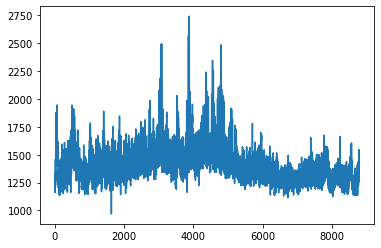

In [118]:
%matplotlib inline
plt.plot(garo,predictList)
plt.show()

In [125]:
sol=pd.read_excel('Solution Form.xlsx',sheet_name='Sheet1',header=0)
del sol['DEMAND']
sol.head()

,Date,Day,Hour,Month,Year
0,2001-01-08 00:00:00,1,1,1,2008
1,2001-01-08 00:00:00,1,2,1,2008
2,2001-01-08 00:00:00,1,3,1,2008
3,2001-01-08 00:00:00,1,4,1,2008
4,2001-01-08 00:00:00,1,5,1,2008


In [127]:
sol['DEMAND']=predictList

In [128]:
sol.tail()

,Date,Day,Hour,Month,Year,DEMAND
8779,12/31/08,31,20,12,2008,1420.056139
8780,12/31/08,31,21,12,2008,1411.089158
8781,12/31/08,31,22,12,2008,1343.898282
8782,12/31/08,31,23,12,2008,1272.525179
8783,12/31/08,31,24,12,2008,1261.609734


In [130]:
solution = sol[['DEMAND','Date','Day','Hour','Month','Year']]
solution.head()

,DEMAND,Date,Day,Hour,Month,Year
0,1320.974924,2001-01-08 00:00:00,1,1,1,2008
1,1269.151333,2001-01-08 00:00:00,1,2,1,2008
2,1179.840730,2001-01-08 00:00:00,1,3,1,2008
3,1165.183740,2001-01-08 00:00:00,1,4,1,2008
4,1174.089990,2001-01-08 00:00:00,1,5,1,2008


In [131]:
solution.tail()

,DEMAND,Date,Day,Hour,Month,Year
8779,1420.056139,12/31/08,31,20,12,2008
8780,1411.089158,12/31/08,31,21,12,2008
8781,1343.898282,12/31/08,31,22,12,2008
8782,1272.525179,12/31/08,31,23,12,2008
8783,1261.609734,12/31/08,31,24,12,2008


In [132]:
solution.to_excel('Solution Form_2.xlsx')